In [23]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')  # Untuk tokenisasi kata
nltk.download('stopwords')  # Untuk daftar stopwords
nltk.download('punkt_tab')
nltk.data.path.append('/root/nltk_data')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [21]:
# Load Dataset
file_path = "/content/youtube_comments-20250301_022205.csv"
df = pd.read_csv(file_path)

In [25]:
# Drop missing values
df.dropna(subset=['content'], inplace=True)

# Text Preprocessing
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['cleaned_content'] = df['content'].apply(clean_text)

In [30]:
# Sentiment Labeling using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned_content'].apply(get_sentiment)
print(df['sentiment'])

0        neutral
1        neutral
2        neutral
3       positive
4        neutral
          ...   
2997     neutral
2998     neutral
2999     neutral
3000     neutral
3001     neutral
Name: sentiment, Length: 3000, dtype: object


In [32]:
# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_content'])
y = df['sentiment']

In [33]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training & Evaluation
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.8083
              precision    recall  f1-score   support

    negative       1.00      0.07      0.12        60
     neutral       0.80      1.00      0.88       413
    positive       0.88      0.55      0.68       127

    accuracy                           0.81       600
   macro avg       0.89      0.54      0.56       600
weighted avg       0.83      0.81      0.76       600

SVM Accuracy: 0.9083
              precision    recall  f1-score   support

    negative       0.97      0.65      0.78        60
     neutral       0.89      1.00      0.94       413
    positive       0.95      0.75      0.84       127

    accuracy                           0.91       600
   macro avg       0.94      0.80      0.85       600
weighted avg       0.91      0.91      0.90       600

Random Forest Accuracy: 0.9100
              precision    recall  f1-score   support

    negative       1.00      0.68      0.81        60
     neutral       0.90      1.00      0.94     

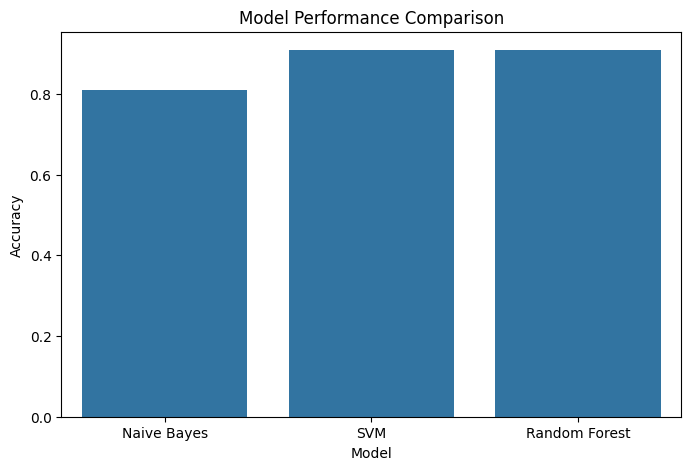

In [29]:
# Visualizing Performance
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()